In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [8]:
file_path = r'C:\Users\This PC\Downloads\Student_performance_data _.csv'

# Đọc tệp CSV vào DataFrame
df = pd.read_csv(file_path)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [10]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [11]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [12]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


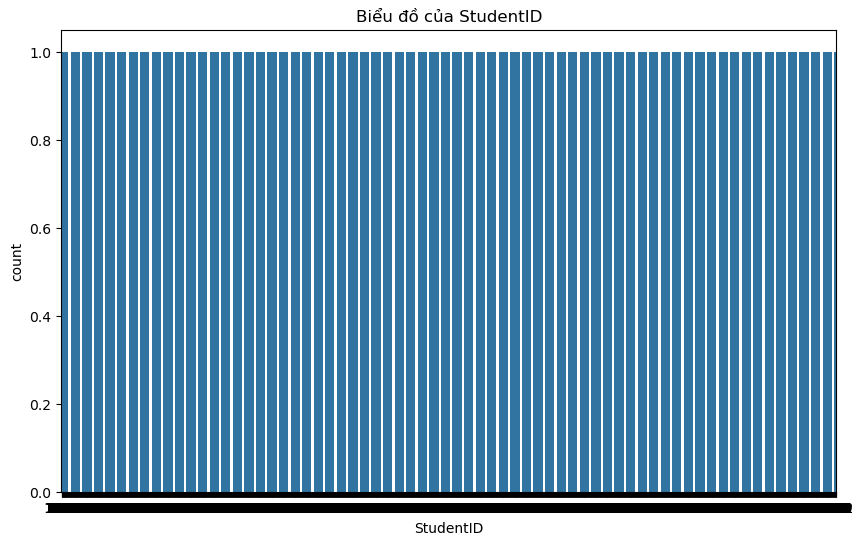

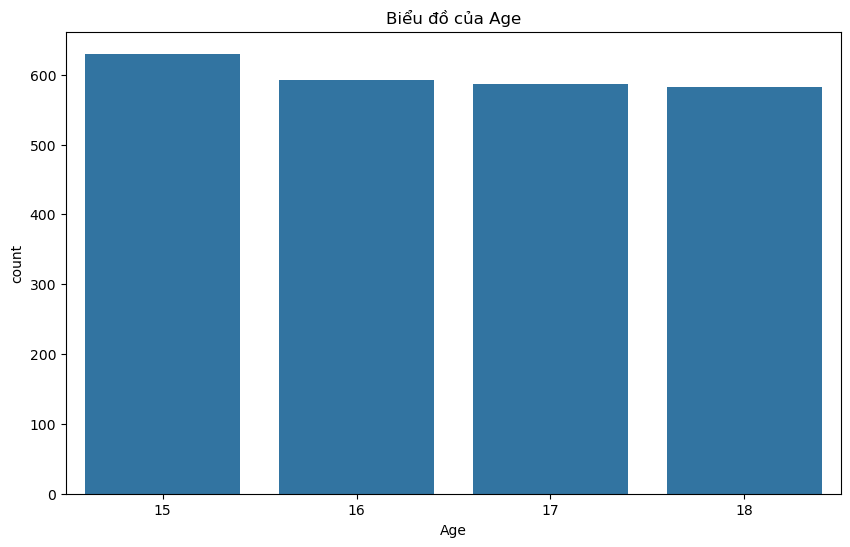

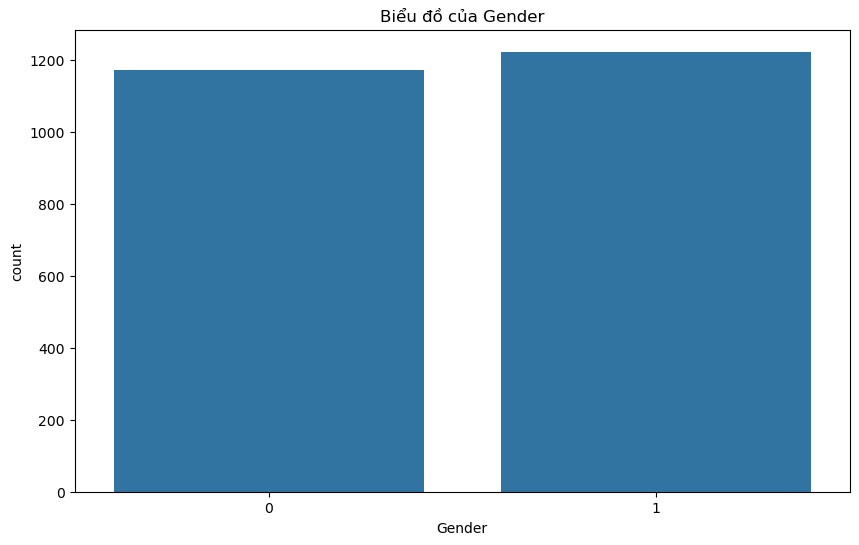

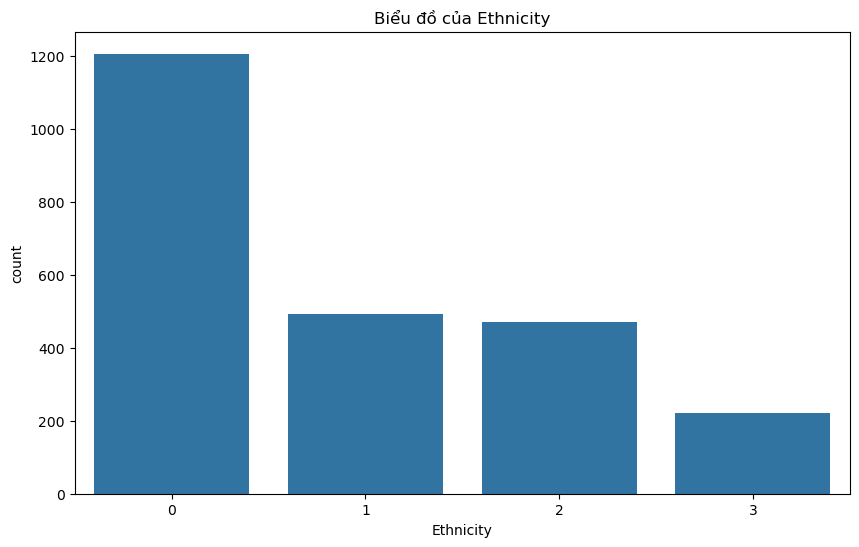

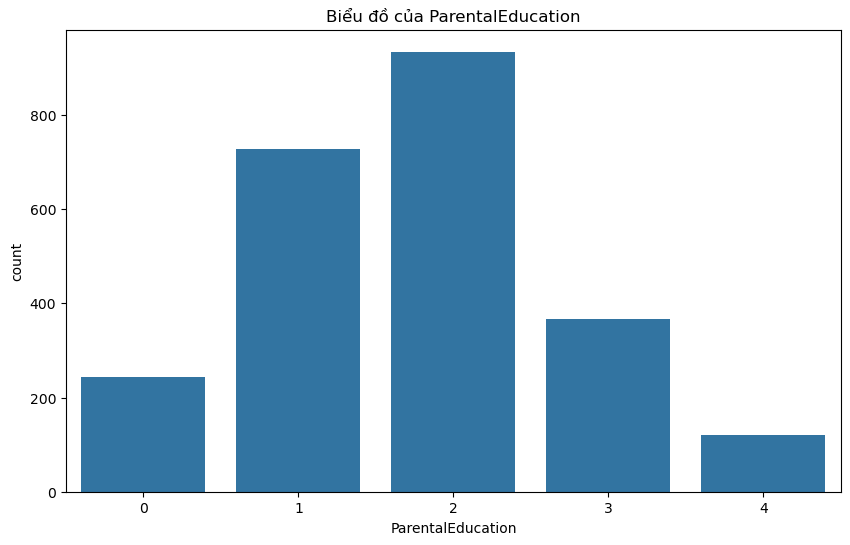

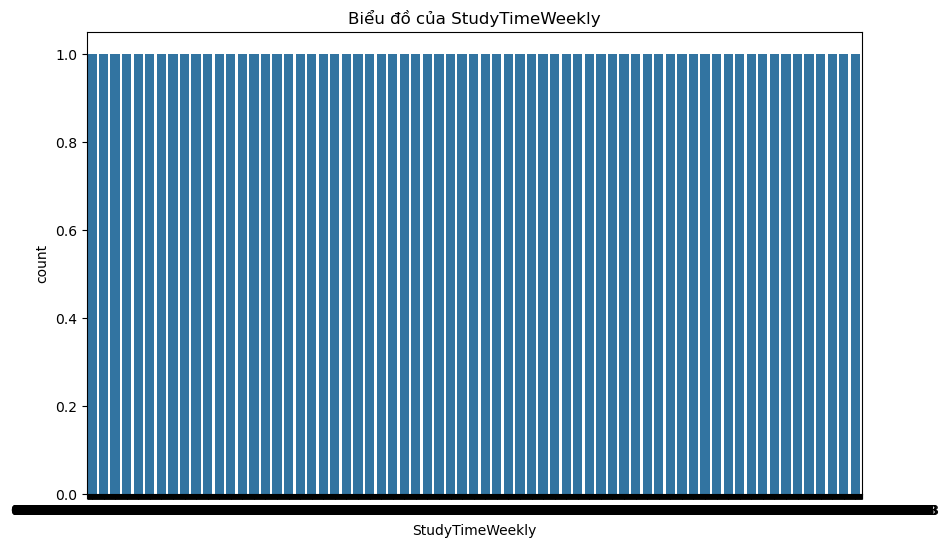

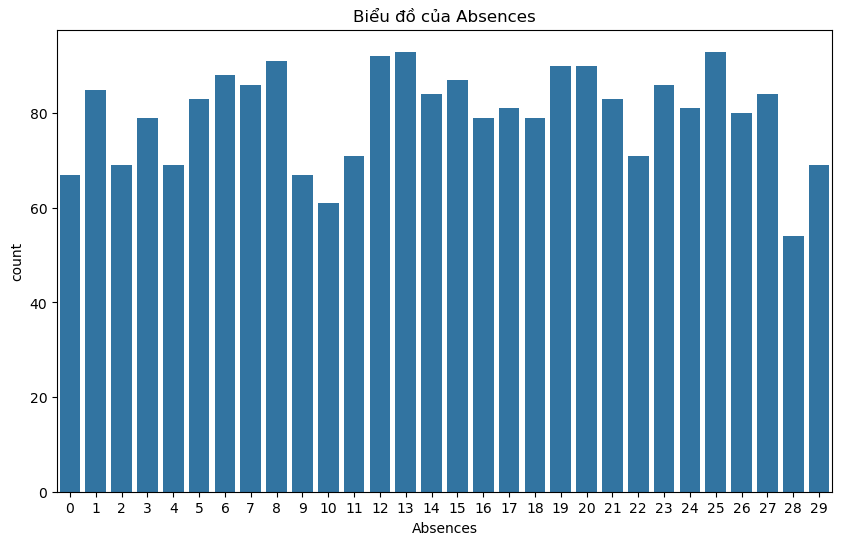

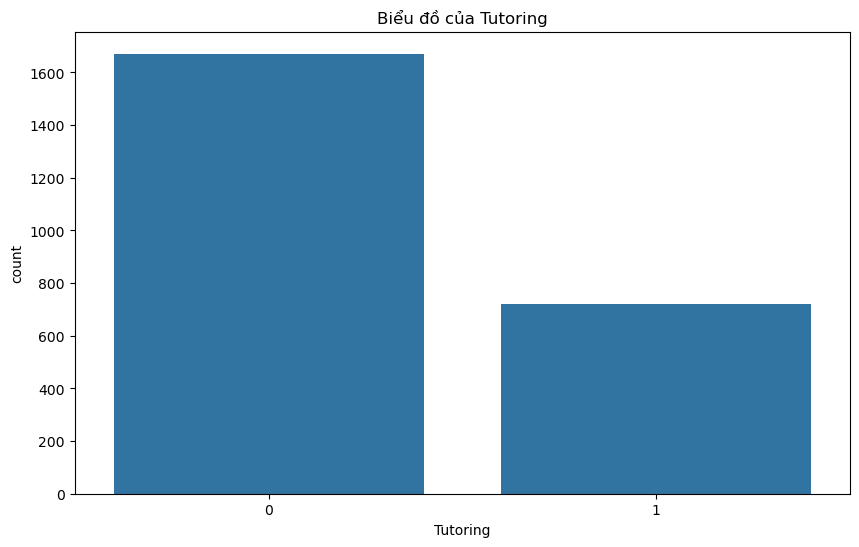

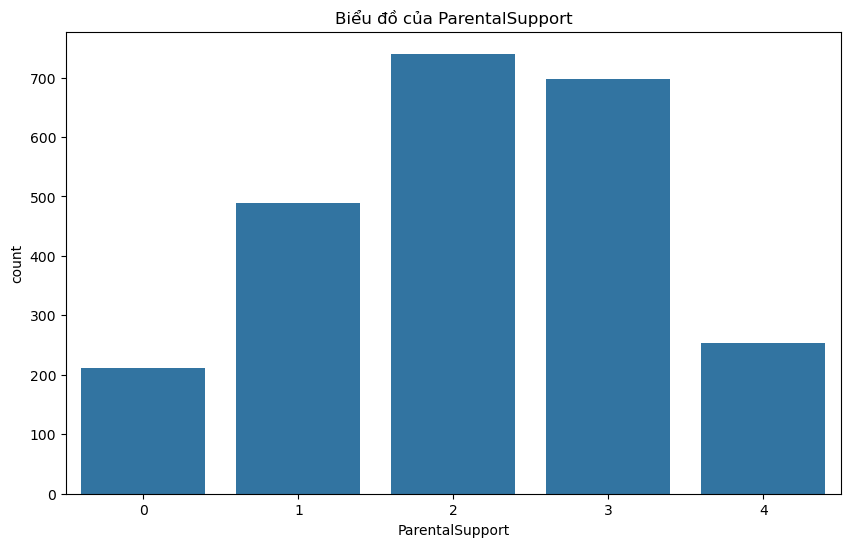

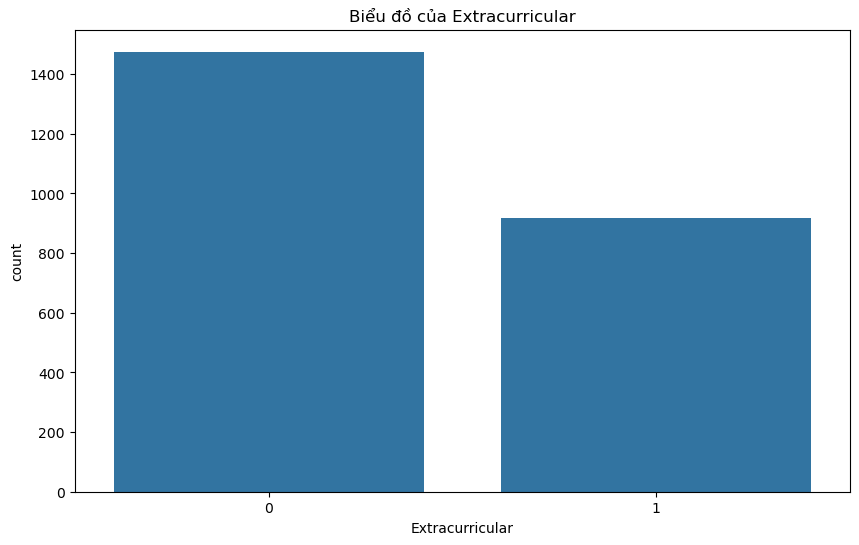

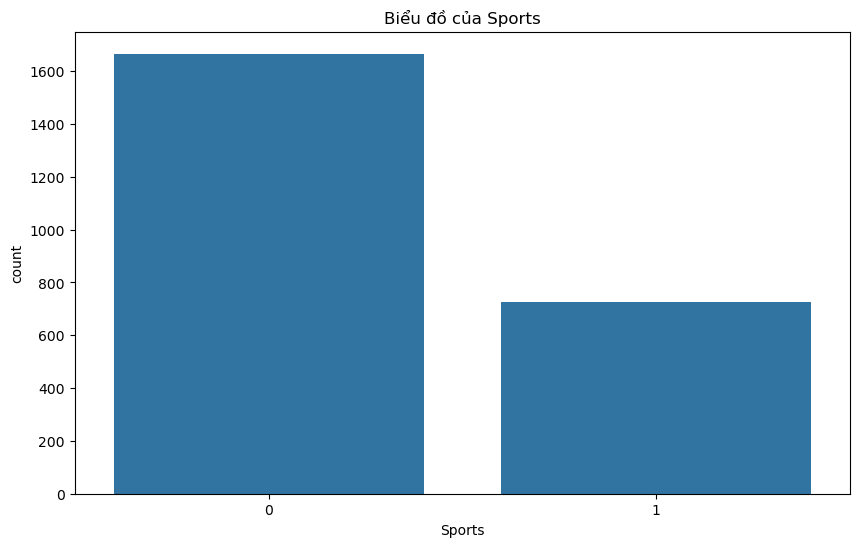

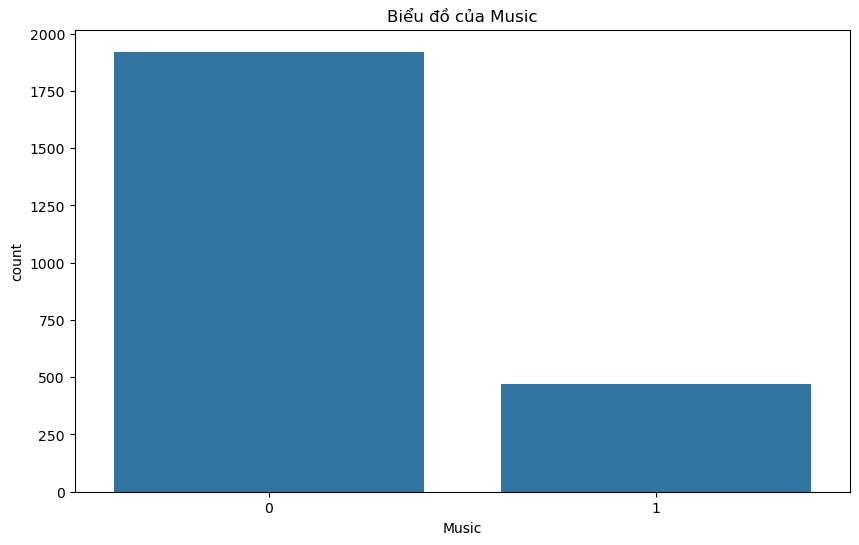

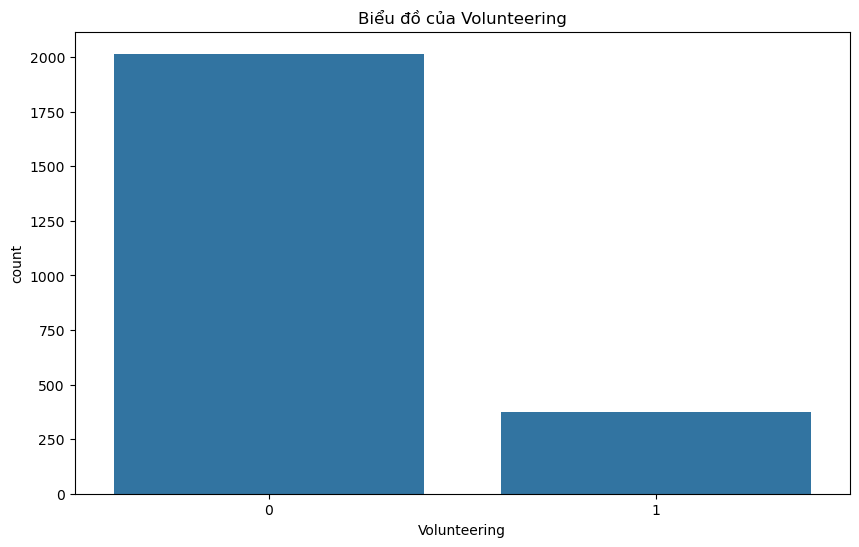

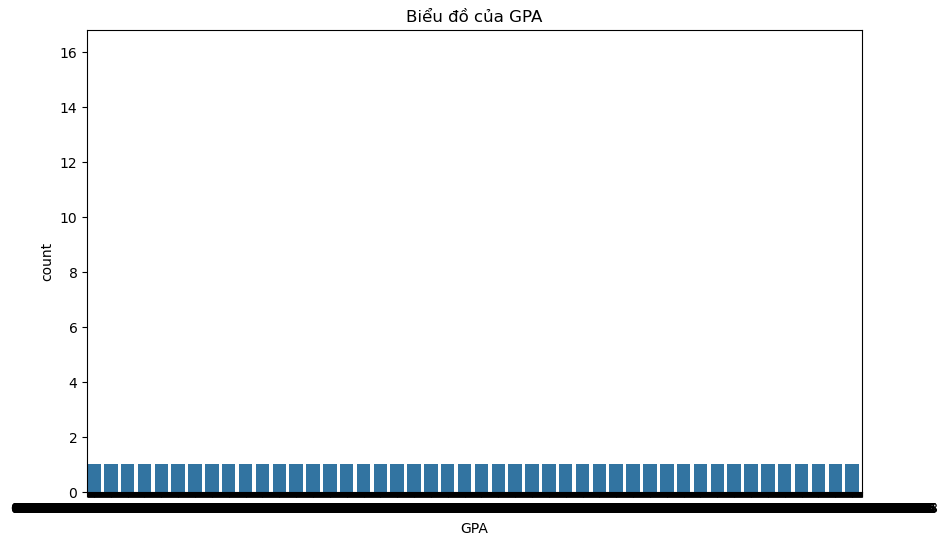

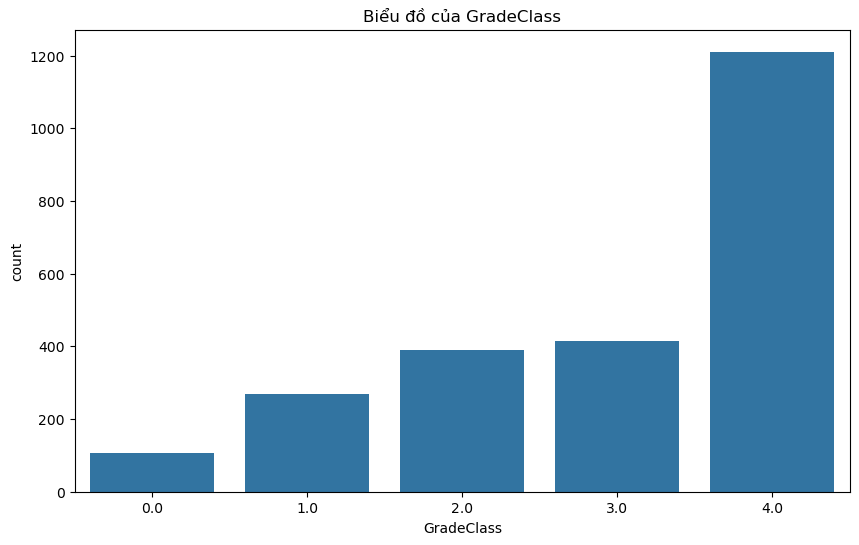

In [15]:
#Vẽ biểu đồ cột cho tưng feature
features = ['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 
           'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular',
           'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']

for feature in features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Biểu đồ của {feature}')
    plt.show()


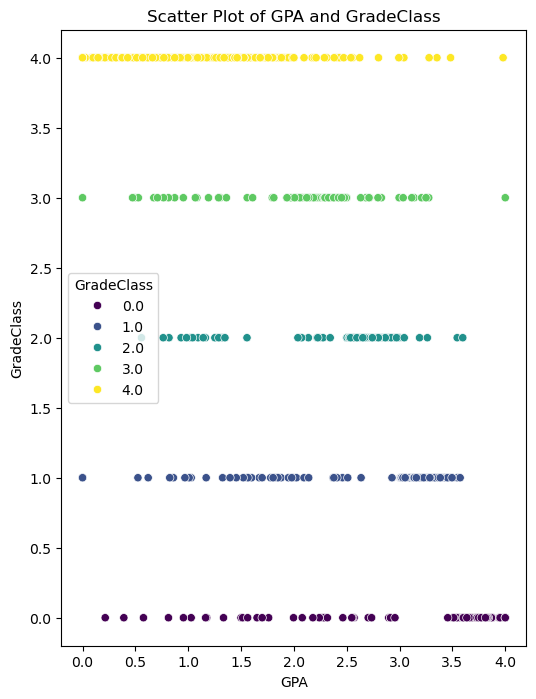

In [20]:
# Phân tích dữ liệu --> Biểu đồ scatter phân bố dữ liệu target
plt.figure(figsize=(6,8))
sns.scatterplot(x='GPA', y='GradeClass', data=df, hue='GradeClass', palette='viridis')
plt.title('Scatter Plot of GPA and GradeClass')
plt.xlabel('GPA')
plt.ylabel('GradeClass')
plt.show()


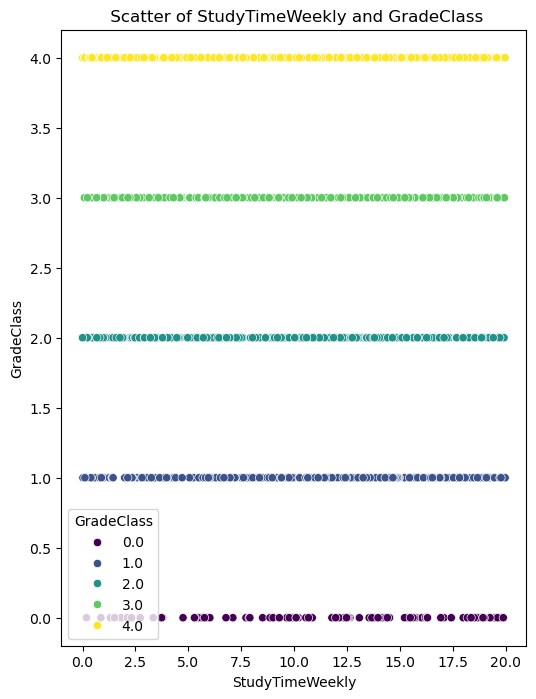

In [19]:
plt.figure(figsize=(6,8))
sns.scatterplot(x='StudyTimeWeekly', y='GradeClass', data=df, hue='GradeClass', palette='viridis')
plt.title(' Scatter of StudyTimeWeekly and GradeClass')
plt.xlabel('StudyTimeWeekly')
plt.ylabel('GradeClass')
plt.show()

In [23]:
# 3.Chia tập huấn luyện, test. Sử dụng Cross-validation
# Chia dữ liệu
x = df.drop(columns=['StudentID', 'GradeClass'])
y = df['GradeClass']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [24]:
# Khởi tạo mô hình
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [25]:
# Sử dụng Cross - validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

print(f'Accuracy scores for each fold: {scores}')
print(f'Mean accuracy: {scores.mean():.2f}')
print(f'Standard deviation of accuracy: {scores.std():.2f}')

Accuracy scores for each fold: [0.91231733 0.91649269 0.93723849 0.93933054 0.89958159]
Mean accuracy: 0.92
Standard deviation of accuracy: 0.02


In [28]:
# 4.Huấn luyện mô hình 
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

In [30]:
#Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.52      0.65        33
         1.0       0.86      0.85      0.86        80
         2.0       0.91      0.89      0.90       121
         3.0       0.90      0.89      0.89       127
         4.0       0.94      0.99      0.96       357

    accuracy                           0.92       718
   macro avg       0.90      0.83      0.85       718
weighted avg       0.92      0.92      0.91       718



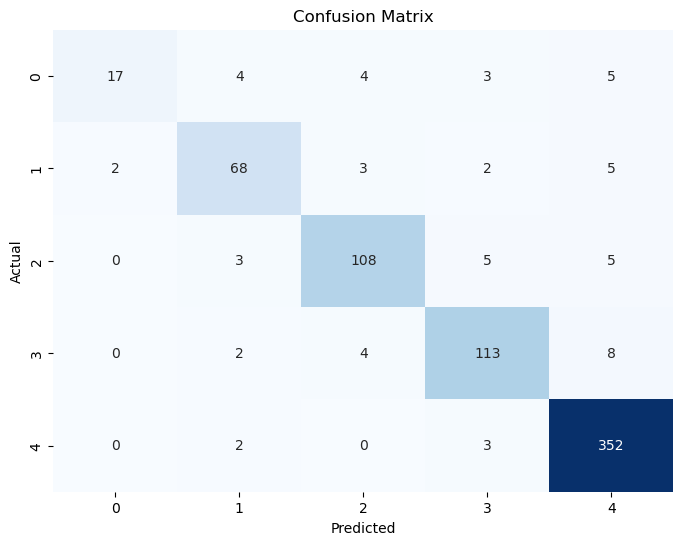

In [31]:
#Sử dụng ma trận nhầm lẫn để đánh giá hiệu suất
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
#Ma trận tương quan
correlation_matrix = df.corr()

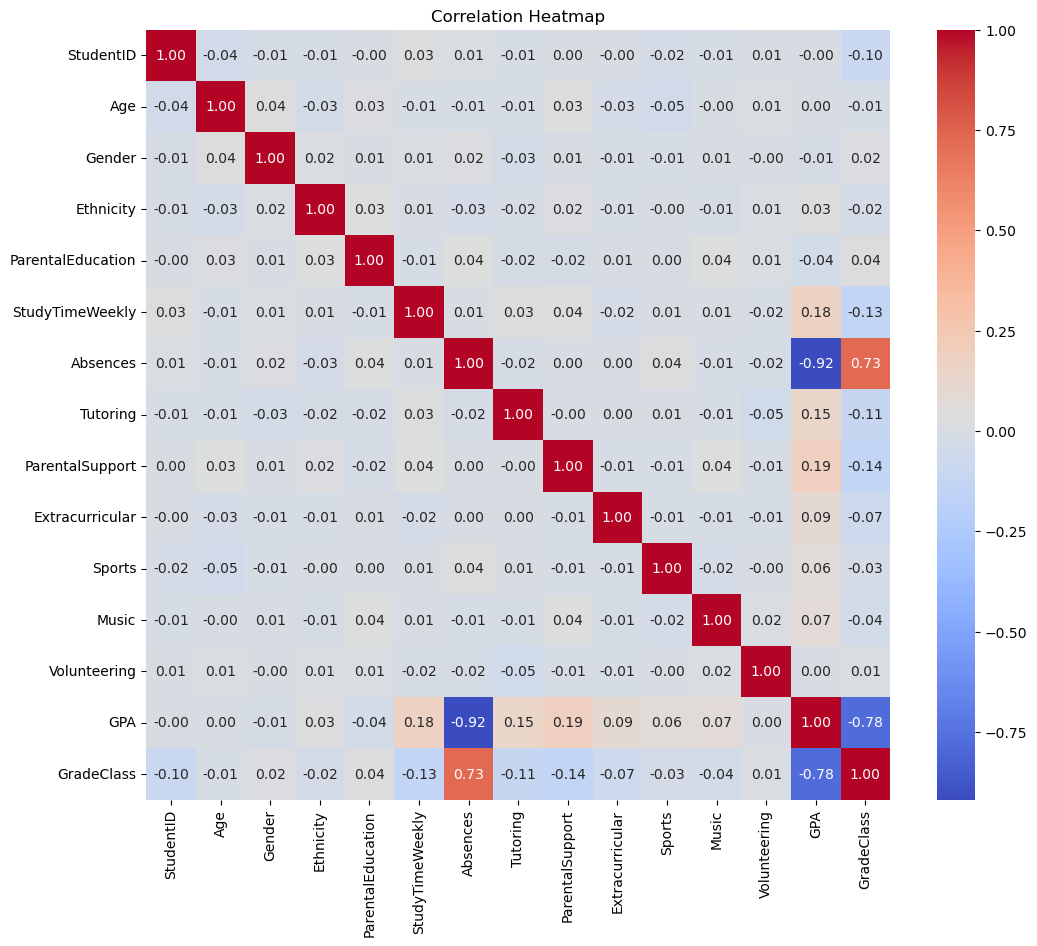

In [36]:
#Vẽ heatmap ma trận tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
#Ma trận hiệp phương sai
cov_matrix = df.cov()

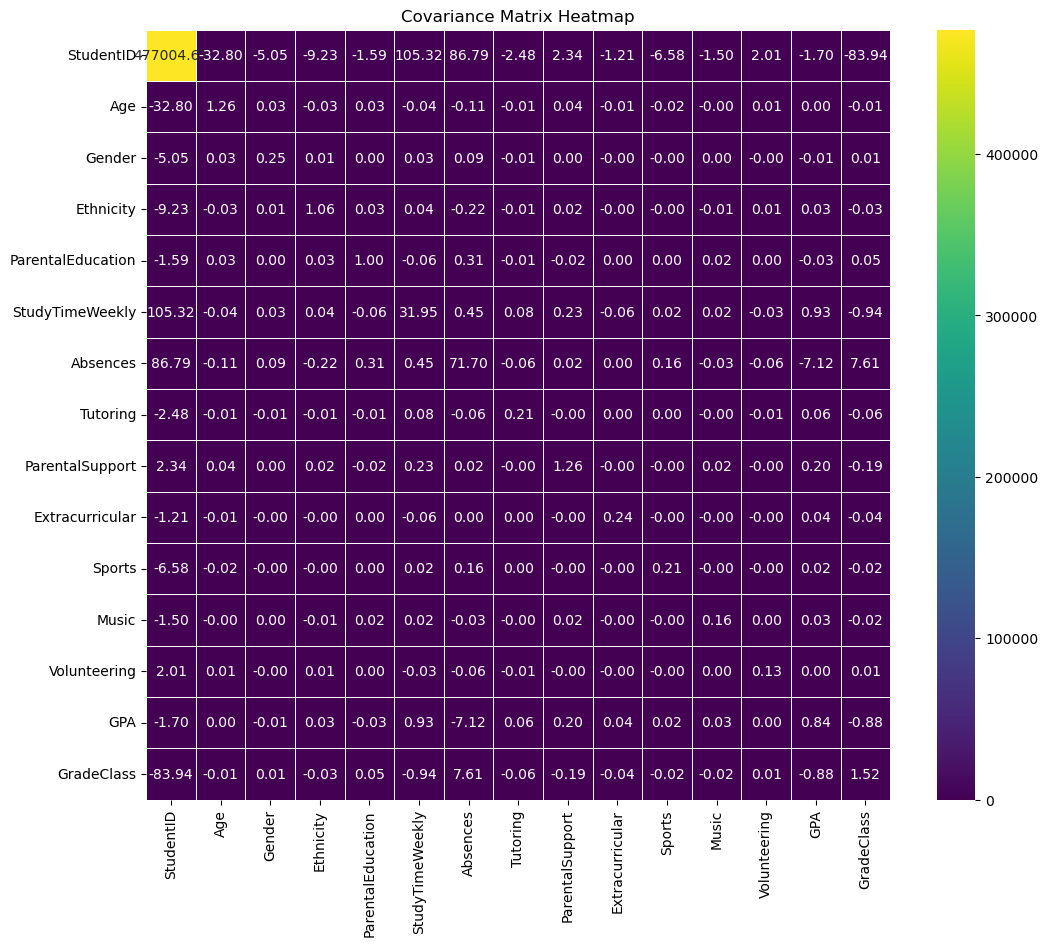

In [39]:
# Vẽ ma trận hiệp phương sai
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.show()